<a href="https://colab.research.google.com/github/nimasteryang/AndroidOnStack/blob/main/data_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# Install required packages.
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
!pip install -q torch-geometric

     |████████████████████████████████| 2.6MB 29.7MB/s 
     |████████████████████████████████| 1.4MB 31.8MB/s 
     |████████████████████████████████| 225kB 28.5MB/s 
     |████████████████████████████████| 235kB 57.2MB/s 
     |████████████████████████████████| 51kB 7.7MB/s 


In [46]:
from gensim.models.word2vec import Word2Vec
import re
import model,parse
import pandas as pd

In [101]:
filename = "/content/devign_one_output.json"
df = pd.read_json(filename)
df.head()

,target,func,CPG,CDG,DDG,No2St
0,0,"static void v4l2_free_buffer(void *opaque, uin...","digraph v4l2_free_buffer { \r\n""1000100"" [lab...","digraph v4l2_free_buffer { \r\n""1000114"" [lab...","digraph v4l2_free_buffer { \r\n""1000100"" [lab...",{'1': [{'1000100': 'static void v4l2_free_buff...


In [44]:
code = df.func.values[0]
no_2_st = df.No2St.values[0]
no_2_st = dict([int(key), value] for key, value in no_2_st.items()) 

W2V MODEL

In [99]:
token_code = parse.tokenizer(code)
model = Word2Vec([token_code], min_count=1)
print(model)

Word2Vec(vocab=41, size=100, alpha=0.025)


In [107]:
import pydot
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

In [111]:
cpg_graph = df.CPG.values[0]
pydot_graph = pydot.graph_from_dot_data(cpg_graph)
G = nx.drawing.nx_pydot.from_pydot(pydot_graph[0])

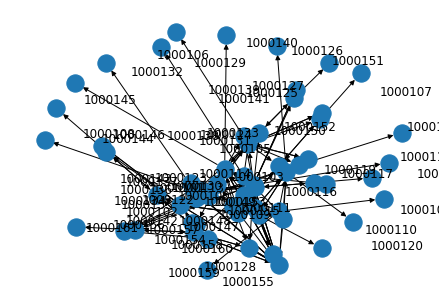

In [118]:
nx.draw(G,nx.spring_layout(G))
labels = nx.draw_networkx_labels(G, pos=nx.spring_layout(G))

In [121]:
G.nodes.data()

NodeDataView({'1000100': {'label': '"(METHOD,v4l2_free_buffer)"'}, '1000101': {'label': '"(PARAM,void *opaque)"'}, '1000102': {'label': '"(PARAM,uint8_t *unused)"'}, '1000103': {'label': '"(BLOCK,,)"'}, '1000104': {'label': '"(LOCAL,avbuf: V4L2Buffer *)"'}, '1000105': {'label': '"(<operator>.assignment,* avbuf = opaque)"'}, '1000106': {'label': '"(IDENTIFIER,avbuf,* avbuf = opaque)"'}, '1000107': {'label': '"(IDENTIFIER,opaque,* avbuf = opaque)"'}, '1000108': {'label': '"(LOCAL,s: V4L2m2mContext *)"'}, '1000109': {'label': '"(<operator>.assignment,*s = buf_to_m2mctx(avbuf))"'}, '1000110': {'label': '"(IDENTIFIER,s,*s = buf_to_m2mctx(avbuf))"'}, '1000111': {'label': '"(buf_to_m2mctx,buf_to_m2mctx(avbuf))"'}, '1000112': {'label': '"(IDENTIFIER,avbuf,buf_to_m2mctx(avbuf))"'}, '1000113': {'label': '"(CONTROL_STRUCTURE,if (atomic_fetch_sub(&avbuf->context_refcount, 1) == 1),if (atomic_fetch_sub(&avbuf->context_refcount, 1) == 1))"'}, '1000114': {'label': '"(<operator>.equals,atomic_fetch_su

In [123]:
G.edges.data()

OutMultiEdgeDataView([('1000100', '1000101', {'label': '"AST: "'}), ('1000100', '1000101', {'label': '"DDG: "'}), ('1000100', '1000102', {'label': '"AST: "'}), ('1000100', '1000102', {'label': '"DDG: "'}), ('1000100', '1000103', {'label': '"AST: "'}), ('1000100', '1000161', {'label': '"AST: "'}), ('1000100', '1000105', {'label': '"CFG: "'}), ('1000100', '1000105', {'label': '"DDG: "'}), ('1000100', '1000109', {'label': '"DDG: "'}), ('1000100', '1000111', {'label': '"DDG: "'}), ('1000100', '1000115', {'label': '"DDG: "'}), ('1000100', '1000114', {'label': '"DDG: "'}), ('1000100', '1000123', {'label': '"DDG: "'}), ('1000100', '1000154', {'label': '"DDG: "'}), ('1000101', '1000161', {'label': '"DDG: opaque"'}), ('1000101', '1000105', {'label': '"DDG: opaque"'}), ('1000102', '1000161', {'label': '"DDG: unused"'}), ('1000103', '1000104', {'label': '"AST: "'}), ('1000103', '1000105', {'label': '"AST: "'}), ('1000103', '1000108', {'label': '"AST: "'}), ('1000103', '1000109', {'label': '"AST: 

In [127]:
AST_G = nx.DiGraph(((source, target, attr) for source, target, attr in G.edges(data=True) if "AST" in attr['label'] ))

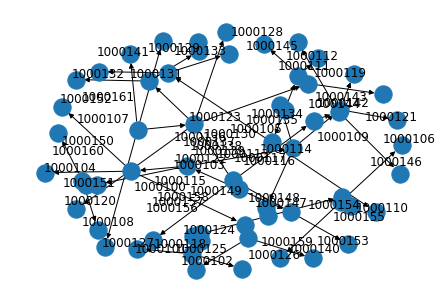

In [128]:
nx.draw(AST_G,nx.spring_layout(AST_G))
AST_labels = nx.draw_networkx_labels(AST_G, pos=nx.spring_layout(AST_G))